# Clustering Text Data

Yupeng Yang

Jan 24, 2019

This assignment uses 'articles.pkl' file that has 1405 articles from 'Arts','Books','Business Day', 'Magazine', 'Opinion', 'Real Estate', 'Sports', 'Travel', 'U.S.', and 'World'. This is a [pickled](https://docs.python.org/2/library/pickle.html) data frame and can be loaded back into a [data frame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html#pandas.read_pickle).  You probably want to eventually get it out of pandas DataFrames when you perform your analysis.

| Section | count|
| :---| :--|
|Arts| 91|
|Automobiles| 5|
|Books| 37|
|Booming| 7|
|Business Day| 100|
|Corrections| 10|
|Crosswords & Games| 2|
|Dining & Wine| 19|
|Education| 4|
|Fashion & Style| 46|
|Great Homes and Destinations| 5|
|Health| 10|
|Home & Garden| 10|
|Magazine| 11|
|Movies| 28|
|N.Y. / Region| 92|
|Opinion| 84|
|Paid Death Notices| 11|
|Real Estate| 13|
|Science| 18|
|Sports| 134|
|Technology| 13|
|Theater| 16|
|Travel| 9|
|U.S.| 88|
|World | 131|
|Your Money | 6 |

1. Use pandas' `pd.read_pickle()`. to load data to DataFrame. Apply kmeans clustering to the `articles.pkl`.

2. To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" article or the average occurances of words for that cluster.

3. But for topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

    * Sort each centroid vector to find the top 10 features
    * Go back to your vectorizer object to find out what words each of these features corresponds to.

4. Look at the docs for `TfidfVectorizer` and see if you can limit the number of features (words) included in the feature matrix.  This can help reduce some noise and make the centroids slightly more sensible.  Limit the `max_features` and see if the words of the topics change at all.

5. An alternative to finding out what each cluster represents is to look at the articles that are assigned to it.  Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic.

6. What 'topics' has kmeans discovered? Can you try to assign a name to each?  Do the topics change as you change k (just try this for a few different values of k)?

7. If you set k == to the number of NYT sections in the dataset, does it return topics that map to a section?  Why or why not?

8. Try your clustering only with a subset of the original sections.  Do the topics change or get more specific if you only use 3 sections (i.e. Sports, Art, and Business)?  Are there any cross section topics (i.e. a Sports article that talks about the economics of a baseball team) you can find? 

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

## K-Means

#### Load data from articles.pkl to DataFrame

In [2]:
import numpy as np
import pandas as pd

In [3]:
articles_df = pd.read_pickle("data/articles.pkl")

In [4]:
articles_df

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
1,article,http://www.nytimes.com/2013/10/03/us/new-immig...,House Democrats on Wednesday unveiled an immig...,House Democrats unveil immigration bill that p...,House Democrats on Wednesday unveiled an immig...,National,83,The New York Times,U.S.,None,524cf71338f0d8198973ff7b,2013-10-03T00:00:00Z,21,New Immigration Bill Put Forward,house unveiled immigration bill provides path ...
2,article,http://www.nytimes.com/2013/10/03/us/arizona-j...,A federal judge on Wednesday ordered the appoi...,Federal Judge Murray Snow orders the appointme...,A federal judge on Wednesday ordered the appoi...,National,160,The New York Times,U.S.,None,524cf50e38f0d8198973ff79,2013-10-03T00:00:00Z,21,Arizona: Judge Orders Monitor to Oversee Maric...,federal judge wednesday ordered appointment in...
3,article,http://www.nytimes.com/2013/10/03/us/texas-sta...,Texas has turned to a compounding pharmacy to ...,"Documents show that Texas, nation's most activ...",Texas has turned to a compounding pharmacy to ...,National,112,The New York Times,U.S.,None,524cf39a38f0d8198973ff78,2013-10-03T00:00:00Z,21,Texas: State Bought Execution Drugs From a Com...,texas nation’s active death-penalty state turn...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...
5,article,http://www.nytimes.com/2013/10/03/sports/socce...,A Brazilian labor judge ordered the suspension...,None,A Brazilian labor judge ordered the suspension...,Sports,49,The New York Times,Sports,Soccer,524ced7138f0d8198973ff67,2013-10-03T00:00:00Z,14,Judge Halts Work on World Cup Stadium,brazilian labor judge ordered suspension const...
6,article,http://www.nytimes.com/2013/10/03/sports/socce...,Defending champion Bayern Munich produced a po...,"Bayern Munich beats Manchester City, 3-1, in U...",Defending champion Bayern Munich produced a po...,Sports,190,The New York Times,Sports,Soccer,524ce87638f0d8198973ff59,2013-10-03T00:00:00Z,14,Bayern Munich Dominates Manchester City,defending champion bayern munich produced powe...
7,article,http://www.nytimes.com/2013/10/03/sports/ameri...,Simone Biles used superb floor and vault exerc...,American Simone Biles sweeps past teammate Kyl...,Simone Biles used superb floor and vault exerc...,Sports,49,The New York Times,Sports,None,524cebfb38f0d8198973ff5f,2013-10-03T00:00:00Z,14,American Leads in World Gymnastics All-Around,simone bile used superb floor vault exercise s...
8,article,http://www.nytimes.com/2013/10/03/sports/hocke...,The Devils announced that Cory Schneider would...,New Jersey Devils announce that Cory Schneider...,The Devils announced that Cory Schneider would...,Sports,110,The New York Times,Sports,Hockey,524ceb0338f0d8198973ff5c,2013-10-03T00:00:00Z,14,Brodeur’s Starting Streak to End,the devil announced cory schneider would start...
9,article,http://www.nytimes.com/2013/10/03/sports/vonn-...,Lindsey Vonn’s surgically repaired right knee ...,Lindsey Vonn announces that her surgically rep...,Lindsey Vonn’s surgically repaired right knee ...,Sports,61,The New York Times,Sports,None,524ce70738f0d8198973ff58,2013-10-03T00:00:00Z,14,Vonn Is Close to Returning,lindsey vonn’s surgically repaired right knee ...


#### Vectorize the article content as tf-idf

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names() #features 实际上是每个word in the article
features

['00',
 '000',
 '0000',
 '0008',
 '000th',
 '001st',
 '005',
 '0077',
 '01',
 '0106',
 '014',
 '018',
 '02',
 '03',
 '0313',
 '0363',
 '04',
 '0440',
 '045',
 '046',
 '05',
 '051',
 '06',
 '0600',
 '061',
 '069',
 '07',
 '0736',
 '08',
 '080',
 '083',
 '088',
 '09',
 '0986',
 '10',
 '100',
 '100th',
 '101',
 '101st',
 '102',
 '103',
 '103rd',
 '104',
 '105',
 '105th',
 '106',
 '1063',
 '107',
 '107th',
 '108',
 '108th',
 '109',
 '10k',
 '10th',
 '11',
 '110',
 '1100s',
 '1109',
 '111',
 '111th',
 '112',
 '113',
 '1133',
 '114',
 '114th',
 '115',
 '116',
 '1160',
 '116th',
 '117',
 '118',
 '119',
 '11th',
 '12',
 '120',
 '121',
 '1212',
 '122',
 '122nd',
 '123',
 '124',
 '125',
 '1258',
 '126',
 '127',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '131',
 '1315',
 '132',
 '133',
 '134',
 '135',
 '136',
 '1368',
 '137',
 '1371',
 '138',
 '139',
 '13th',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '14th',
 '15',
 '150',
 '1500',
 '150th',
 '151',
 '1

#### Apply k-means clustering to the vectors

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(X) #divided to 8 clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Inspect the centroids

In [7]:
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.00000000e+00 2.82594778e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32468622e-02 0.00000000e+00 ... 0.00000000e+00
  7.26741390e-04 0.00000000e+00]
 [0.00000000e+00 1.07575451e-02 0.00000000e+00 ... 9.48734739e-05
  1.05043343e-04 0.00000000e+00]
 ...
 [0.00000000e+00 1.10883826e-02 0.00000000e+00 ... 0.00000000e+00
  6.11632051e-04 0.00000000e+00]
 [0.00000000e+00 1.25823024e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.27620873e-03 4.10393510e-04 ... 2.39809086e-04
  0.00000000e+00 0.00000000e+00]]


#### Find the top 10 features for each cluster.

In [8]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1] #取top10的values
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

top features for each cluster:
0: yard, touchdown, game, quarterback, giant, team, season, smith, jet, manning
1: attack, said, syria, killed, chemical, government, syrian, official, weapon, security
2: mr, said, state, government, percent, year, party, new, court, company
3: team, game, cup, said, player, season, race, league, year, sport
4: yankee, game, rivera, season, inning, run, pettitte, hit, said, mets
5: republican, health, house, government, care, shutdown, law, obama, senate, mr
6: iran, rouhani, iranian, nuclear, mr, obama, israel, united, netanyahu, president
7: mr, said, art, new, music, ms, like, work, year, company


#### Limit the number of features and see if the words of the topics change.

In [66]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000) #限制一下feature dimension
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

top features for each cluster with 1000 max features:
0: game, team, season, said, player, yard, cup, league, coach, play
1: republican, health, house, care, government, senate, obama, mr, law, shutdown
2: iran, rouhani, iranian, nuclear, mr, obama, israel, united, president, netanyahu
3: mr, music, ms, new, song, opera, dance, work, night, like
4: said, sept, new, people, year, art, world, like, work, editor
5: yankee, game, rivera, inning, season, run, pettitte, hit, said, mets
6: mr, said, government, official, court, state, party, attack, police, people
7: percent, company, said, bank, china, market, year, government, price, million


In [67]:
X = vectorizer.fit_transform(articles_df['content'])
print(X)

  (0, 378)	0.06134620497853097
  (0, 134)	0.05972162462797551
  (0, 349)	0.14580844303213936
  (0, 366)	0.13822590040969093
  (0, 960)	0.06370924439375786
  (0, 478)	0.047326450123713434
  (0, 424)	0.16552865139489806
  (0, 251)	0.49717206989025586
  (0, 726)	0.1646905406864094
  (0, 978)	0.2177612921325357
  (0, 159)	0.07150324738026602
  (0, 710)	0.051066306337989524
  (0, 907)	0.04696034239821702
  (0, 853)	0.06676105967345541
  (0, 509)	0.09523753033926384
  (0, 981)	0.06356164761113942
  (0, 995)	0.21252091710287463
  (0, 673)	0.36814210129477265
  (0, 614)	0.15100316430217675
  (0, 928)	0.07105868124029556
  (0, 506)	0.0548968468954698
  (0, 656)	0.18403861493559293
  (0, 897)	0.4162408572633385
  (0, 918)	0.07041107080238818
  (0, 609)	0.09923644925686433
  :	:
  (1404, 475)	0.019527539188522444
  (1404, 677)	0.025395047654482326
  (1404, 683)	0.04644275682299228
  (1404, 595)	0.021091806091561385
  (1404, 239)	0.7106428510455739
  (1404, 396)	0.023536571368514857
  (1404, 401)	

In [59]:
articles_df['content']

0       the original goal building model football fore...
1       house unveiled immigration bill provides path ...
2       federal judge wednesday ordered appointment in...
3       texas nation’s active death-penalty state turn...
4       rafael nadal aiming end novak djokovic’s run 1...
5       brazilian labor judge ordered suspension const...
6       defending champion bayern munich produced powe...
7       simone bile used superb floor vault exercise s...
8       the devil announced cory schneider would start...
9       lindsey vonn’s surgically repaired right knee ...
10      the whitney handicap winner cross traffic run ...
11      atlanta at least eight people died front tire ...
12      farmer waste management company energy industr...
13      juba south sudan even standard fashion model w...
14      to editor read interest “three sister not chek...
15      to editor re “data back bloomberg disparity wi...
16      safety big issue american many danger persist ...
17      a gove

#### Print out the ***titles*** of a random sample of the articles assigned to each cluster to get a sense of the topic.

In [29]:
assigned_cluster = kmeans.transform(X).argmin(axis=1)
assigned_cluster[:100]
# assigned_cluster = kmeans.predict(X)

array([1, 6, 5, 7, 2, 2, 1, 2, 1, 1, 1, 7, 0, 2, 2, 2, 0, 6, 6, 2, 3, 1,
       7, 7, 5, 5, 4, 2, 7, 2, 2, 2, 6, 2, 5, 4, 0, 7, 7, 2, 7, 2, 7, 1,
       5, 7, 0, 0, 6, 5, 7, 2, 2, 2, 2, 1, 1, 1, 1, 4, 7, 1, 7, 7, 2, 6,
       5, 5, 1, 7, 2, 4, 0, 1, 7, 7, 2, 2, 6, 2, 7, 0, 7, 7, 7, 4, 0, 4,
       7, 2, 2, 0, 5, 2, 2, 5, 7, 5, 5, 2])

In [30]:
np.arange(0, X.shape[0])[:100]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [39]:
#一个重要例子！！
a=np.array([1,2,1,4,1,4,2])
b=np.array([4,4,6,6,3,1,2])
a[b==6]

array([1, 4])

In [13]:
np.arange(0, X.shape[0])[assigned_cluster==1]

array([   0,    6,    8,    9,   10,   21,   43,   55,   56,   57,   58,
         61,   68,   73,  103,  121,  123,  125,  126,  128,  129,  131,
        134,  140,  145,  155,  156,  157,  158,  170,  184,  200,  206,
        218,  220,  225,  230,  231,  232,  237,  246,  248,  253,  264,
        266,  267,  273,  292,  293,  299,  302,  308,  311,  312,  313,
        314,  317,  327,  329,  330,  337,  347,  350,  360,  361,  370,
        371,  386,  390,  391,  400,  404,  405,  407,  409,  425,  432,
        435,  436,  439,  441,  450,  454,  456,  464,  498,  501,  507,
        510,  515,  537,  542,  543,  544,  545,  551,  552,  568,  580,
        590,  620,  630,  634,  638,  645,  660,  664,  665,  668,  673,
        675,  676,  691,  699,  705,  711,  729,  737,  764,  765,  767,
        770,  777,  780,  787,  795,  807,  809,  815,  817,  821,  825,
        838,  848,  856,  868,  869,  870,  872,  875,  880,  883,  887,
        892,  907,  910,  919,  931,  951,  967,  9

In [27]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 3, replace=False) #随机选取
    print("cluster %d:" % i)
    for article in sample_articles:
        print("    %s" % articles_df.loc[article]['headline'])

cluster 0:
    Answers to Readers’ Questions About Hiring the Right Candidate
    Treasury Auctions Set for the Week of Sept. 23
    The Chatter for Sunday, September 22
cluster 1:
    Premier League Coverage Pays Off for NBC
    Rare Rushing Feat by a Princeton Quarterback Helps the Tigers Crush Georgetown
    Mixed Opening Lines in Knicks’ Courtship of Anthony
cluster 2:
    An Escape From Slavery, Now a Movie, Has Long Intrigued Historians
    The Mental Strain of Making Do With Less
    Details Emerge in Suicide of Ohio Kidnapper
cluster 3:
    No Brief Encounter
    For Obama, an Evolving Doctrine on Foreign Policy
    Netanyahu Is Said to View Iran Deal as a Possible Trap
cluster 4:
    In the Market for Another Liriano
    A’s Follow Crisp’s Lead Back Into the Playoffs
    Yankees’ Costly Loss Puts a Damper on Rivera’s Party
cluster 5:
    Arizona: Judge Orders Monitor to Oversee Maricopa County Sheriff
    George Will to Leave ABC News for Fox News
    In Indonesia, a Governor 

#### If you set `k==` to the number of NYT sections in the dataset, does it return topics that map to a section?

In [40]:
from collections import Counter

In [49]:
print(X)

  (0, 378)	0.06134620497853097
  (0, 134)	0.05972162462797551
  (0, 349)	0.14580844303213936
  (0, 366)	0.13822590040969093
  (0, 960)	0.06370924439375786
  (0, 478)	0.047326450123713434
  (0, 424)	0.16552865139489806
  (0, 251)	0.49717206989025586
  (0, 726)	0.1646905406864094
  (0, 978)	0.2177612921325357
  (0, 159)	0.07150324738026602
  (0, 710)	0.051066306337989524
  (0, 907)	0.04696034239821702
  (0, 853)	0.06676105967345541
  (0, 509)	0.09523753033926384
  (0, 981)	0.06356164761113942
  (0, 995)	0.21252091710287463
  (0, 673)	0.36814210129477265
  (0, 614)	0.15100316430217675
  (0, 928)	0.07105868124029556
  (0, 506)	0.0548968468954698
  (0, 656)	0.18403861493559293
  (0, 897)	0.4162408572633385
  (0, 918)	0.07041107080238818
  (0, 609)	0.09923644925686433
  :	:
  (1404, 475)	0.019527539188522444
  (1404, 677)	0.025395047654482326
  (1404, 683)	0.04644275682299228
  (1404, 595)	0.021091806091561385
  (1404, 239)	0.7106428510455739
  (1404, 396)	0.023536571368514857
  (1404, 401)	

In [94]:
cluster = np.arange(0, X.shape[0])[assigned_cluster==2]
topics = articles_df.loc[cluster].dropna()['section_name']
most_common = Counter(topics).most_common()
#most_common[0][0]
most_common

[('Arts', 63), ('Business Day', 2), ('Opinion', 2)]

In [95]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print("top 2 topics for each cluster")
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    if len(most_common) > 1:
        print("Cluster %d: %s" % (i, most_common[0][0]),", %s" % (most_common[1][0]))#结果是[('Arts', 63), ('Business Day', 2), ('Opinion', 2)] 中的前两个。
#结果是[('Arts', 63), ('Business Day', 2), ('Opinion', 2)] 中的前两个。

top 2 topics for each cluster
Cluster 0: Arts , Opinion
Cluster 1: World , Sports
Cluster 2: World , Opinion
Cluster 4: Sports , World
Cluster 5: U.S. , Business Day
Cluster 6: Arts , Business Day
Cluster 7: Opinion , U.S.
Cluster 8: World , Business Day
Cluster 9: Business Day , Opinion


#### Try clustering with a subset of the sections.


In [110]:
# Create masks
cond_sports = articles_df['section_name']=='Sports'
cond_arts = articles_df['section_name']=='Arts'
cond_business_day = articles_df['section_name']=='Business Day'
articles_df[cond_sports]

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...
5,article,http://www.nytimes.com/2013/10/03/sports/socce...,A Brazilian labor judge ordered the suspension...,None,A Brazilian labor judge ordered the suspension...,Sports,49,The New York Times,Sports,Soccer,524ced7138f0d8198973ff67,2013-10-03T00:00:00Z,14,Judge Halts Work on World Cup Stadium,brazilian labor judge ordered suspension const...
6,article,http://www.nytimes.com/2013/10/03/sports/socce...,Defending champion Bayern Munich produced a po...,"Bayern Munich beats Manchester City, 3-1, in U...",Defending champion Bayern Munich produced a po...,Sports,190,The New York Times,Sports,Soccer,524ce87638f0d8198973ff59,2013-10-03T00:00:00Z,14,Bayern Munich Dominates Manchester City,defending champion bayern munich produced powe...
7,article,http://www.nytimes.com/2013/10/03/sports/ameri...,Simone Biles used superb floor and vault exerc...,American Simone Biles sweeps past teammate Kyl...,Simone Biles used superb floor and vault exerc...,Sports,49,The New York Times,Sports,None,524cebfb38f0d8198973ff5f,2013-10-03T00:00:00Z,14,American Leads in World Gymnastics All-Around,simone bile used superb floor vault exercise s...
8,article,http://www.nytimes.com/2013/10/03/sports/hocke...,The Devils announced that Cory Schneider would...,New Jersey Devils announce that Cory Schneider...,The Devils announced that Cory Schneider would...,Sports,110,The New York Times,Sports,Hockey,524ceb0338f0d8198973ff5c,2013-10-03T00:00:00Z,14,Brodeur’s Starting Streak to End,the devil announced cory schneider would start...
9,article,http://www.nytimes.com/2013/10/03/sports/vonn-...,Lindsey Vonn’s surgically repaired right knee ...,Lindsey Vonn announces that her surgically rep...,Lindsey Vonn’s surgically repaired right knee ...,Sports,61,The New York Times,Sports,None,524ce70738f0d8198973ff58,2013-10-03T00:00:00Z,14,Vonn Is Close to Returning,lindsey vonn’s surgically repaired right knee ...
10,article,http://www.nytimes.com/2013/10/03/sports/whitn...,The Whitney Handicap winner Cross Traffic will...,Whitney Handicap winner Cross Traffic will not...,The Whitney Handicap winner Cross Traffic will...,Sports,37,The New York Times,Sports,None,524ce3b538f0d8198973ff53,2013-10-03T00:00:00Z,14,Whitney Winner Out of Breeders’ Cup Classic,the whitney handicap winner cross traffic run ...
21,article,http://www.nytimes.com/2013/10/03/sports/hocke...,After years of financial troubles nearly cause...,"Phoenix Coyotes, following years of financial ...",After years of financial troubles nearly cause...,Sports,1194,The New York Times,Sports,Hockey,524cc19a38f0d8198973fef1,2013-10-03T00:00:00Z,15,"Finally Secure in the Desert, the Coyotes Devo...",glendale ariz. just three month ago phoenix co...
26,article,http://www.nytimes.com/2013/10/03/sports/baseb...,"Atlanta, which led the National League in home...","Atlanta Braves, which led National League in h...","Atlanta, which led the National League in home...",Sports,1067,The New York Times,Sports,Baseball,524cbc0038f0d8198973fee4,2013-10-03T00:00:00Z,12,Braves’ Free Swingers Face Dodgers’ Staff of Aces,in mid-1990s baseball added division series pl...


In [111]:
three_articles_df = articles_df[cond_sports | cond_arts | cond_business_day]

In [112]:
three_articles_df

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...
5,article,http://www.nytimes.com/2013/10/03/sports/socce...,A Brazilian labor judge ordered the suspension...,None,A Brazilian labor judge ordered the suspension...,Sports,49,The New York Times,Sports,Soccer,524ced7138f0d8198973ff67,2013-10-03T00:00:00Z,14,Judge Halts Work on World Cup Stadium,brazilian labor judge ordered suspension const...
6,article,http://www.nytimes.com/2013/10/03/sports/socce...,Defending champion Bayern Munich produced a po...,"Bayern Munich beats Manchester City, 3-1, in U...",Defending champion Bayern Munich produced a po...,Sports,190,The New York Times,Sports,Soccer,524ce87638f0d8198973ff59,2013-10-03T00:00:00Z,14,Bayern Munich Dominates Manchester City,defending champion bayern munich produced powe...
7,article,http://www.nytimes.com/2013/10/03/sports/ameri...,Simone Biles used superb floor and vault exerc...,American Simone Biles sweeps past teammate Kyl...,Simone Biles used superb floor and vault exerc...,Sports,49,The New York Times,Sports,None,524cebfb38f0d8198973ff5f,2013-10-03T00:00:00Z,14,American Leads in World Gymnastics All-Around,simone bile used superb floor vault exercise s...
8,article,http://www.nytimes.com/2013/10/03/sports/hocke...,The Devils announced that Cory Schneider would...,New Jersey Devils announce that Cory Schneider...,The Devils announced that Cory Schneider would...,Sports,110,The New York Times,Sports,Hockey,524ceb0338f0d8198973ff5c,2013-10-03T00:00:00Z,14,Brodeur’s Starting Streak to End,the devil announced cory schneider would start...
9,article,http://www.nytimes.com/2013/10/03/sports/vonn-...,Lindsey Vonn’s surgically repaired right knee ...,Lindsey Vonn announces that her surgically rep...,Lindsey Vonn’s surgically repaired right knee ...,Sports,61,The New York Times,Sports,None,524ce70738f0d8198973ff58,2013-10-03T00:00:00Z,14,Vonn Is Close to Returning,lindsey vonn’s surgically repaired right knee ...
10,article,http://www.nytimes.com/2013/10/03/sports/whitn...,The Whitney Handicap winner Cross Traffic will...,Whitney Handicap winner Cross Traffic will not...,The Whitney Handicap winner Cross Traffic will...,Sports,37,The New York Times,Sports,None,524ce3b538f0d8198973ff53,2013-10-03T00:00:00Z,14,Whitney Winner Out of Breeders’ Cup Classic,the whitney handicap winner cross traffic run ...
12,article,http://www.nytimes.com/2013/10/03/business/ene...,"Clean Energy Fuels is selling Redeem, a vehicl...","Clean Energy Fuels is selling Redeem, vehicle ...","Clean Energy Fuels is selling Redeem, a vehicl...",Business,743,The New York Times,Business Day,Energy & Environment,524ccb1738f0d8198973ff11,2013-10-03T00:00:00Z,9,Fuel From Landfill Methane Goes on Sale,farmer waste management company energy industr...
21,article,http://www.nytimes.com/2013/10/03/sports/hocke...,After years of financial troubles nearly cause...,"Phoenix Coyotes, following years of financial ...",After years of financial troubles nearly cause...,Sports,1194,The New York Times,Sports,Hockey,524cc19a38f0d8198973fef1,2013-10-03T00:00:00Z,15,"Finally Secure in the Desert, the Coyotes Devo...",glendale ariz. just three month ago phoenix co...


In [113]:
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print("top 2 topics for each cluster")
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print("Cluster %d: %s" % (i, most_common[0][0]))
    if len(most_common) > 1:
        print(" %s" % (most_common[1][0]))
#Result is NOT GOOD!

top 2 topics for each cluster
Cluster 0: Sports
 Arts
Cluster 1: Sports
 Arts
Cluster 2: Sports
 Arts


/Users/yupeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


## Hierarchical Clustering

We have been introduced to distance metrics and the idea of similarity, but we will take a deeper dive here. For many machine learning algorithms, the idea of 'distance' between two points is a crucial abstraction to perform analysis. For Kmeans we are usually limited to use Euclidean distance even though our domain might have a more approprite distance function (i.e. Cosine similarity for text).  With Hierarchical clustering we will not be limited in this way.   
We already have our bags and played around with Kmeans clustering.  Now we are going to leverage [Scipy](http://www.scipy.org/) to perform [hierarchical clustering](http://en.wikipedia.org/wiki/Hierarchical_clustering).

1. Hierarchical clustering is more computationally intensive than Kmeans.  Also it is hard to visualize the results of a hierarchical clustering if you have too much data (since it represents its clusters as a tree). Create a subset of the original articles by filtering the data set to contain at least one article from each section and at most around 100 total articles.

    One issue with text (especially when visualzing/clustering) is high dimensionality.  Any method that uses distance metrics is susceptible to the [curse of dimensionality](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/). `scikit-learn` has some utility to do some feature selection for us on our bags.  

2. The first step to using `scipy's` Hierarchical clustering is to first find out how similar our vectors are to one another.  To do this we use the `pdist` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) to compute a similarity matrix of our data (pairwise distances).  First we will just use Euclidean distance.  Examine the shape of what is returned.

3. A quirk of `pdist` is that it returns one looong vector.  Use scipy's [squareform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html) function to get our long vector of distances back into a square matrix.  Look at the shape of this new matrix.

4. Now that we have a square similarity matrix we can start to cluster!  Pass this matrix into scipy's `linkage` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) to compute our hierarchical clusters.

5. We in theory have all the information about our clusters but it is basically impossible to interpret in a sensible manner.  Thankfully scipy also has a function to visualize this madness.  Using scipy's `dendrogram` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) plot the linkages as a hierachical tree.

#### Create a subset of the original articles by filtering the data set to contain at least one article from each section and at most 100 total articles.

In [186]:
# 取Sample: subset of the original articles
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name'] == category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]
small_df

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
11,article,http://www.nytimes.com/2013/10/03/us/eight-are...,Fourteen others were injured when the chartere...,Tennessee authorities say at least eight peopl...,Fourteen others were injured when the chartere...,National,358,The New York Times,U.S.,None,524cd2c138f0d8198973ff1f,2013-10-03T00:00:00Z,22,Eight Are Killed in Tennessee After Tire Blows...,atlanta at least eight people died front tire ...
18,article,http://www.nytimes.com/2013/10/03/opinion/kris...,House Republicans are trying to argue that the...,Nicholas D Kristof Op-Ed column refutes House ...,House Republicans are trying to argue that the...,Editorial,781,The New York Times,Opinion,None,524cc33838f0d8198973fef8,2013-10-03T00:00:00Z,31,"Excuses, Excuses, Excuses",a national zoo close congressional zoo remains...
41,article,http://www.nytimes.com/2014/02/16/travel/midni...,Interested in exploring cultural attractions o...,None,Interested in exploring cultural attractions o...,Travel,1085,The New York Times,Travel,None,52fa7ca338f0d812174ee893,2014-02-16T00:00:00Z,None,"Midnight at the Museum, Breakfast at the Vatican",how breakfast vatican museum open or cocktail ...
50,article,http://www.nytimes.com/2013/10/03/world/asia/c...,Defense ministers from the two countries also ...,None,Defense ministers from the two countries also ...,Foreign,484,The New York Times,World,Asia Pacific,524bbe2538f0d8198973fbe3,2013-10-03T00:00:00Z,,U.S. and South Korea Set Defense Strategy for ...,seoul defense secretary chuck hagel said wedne...
79,article,http://www.nytimes.com/2013/10/02/opinion/tax-...,It is disheartening to see Joseph Lhota offeri...,Editorial expresses disappointment that Joseph...,It is disheartening to see Joseph Lhota offeri...,Editorial,450,The New York Times,Opinion,None,524b714b38f0d8198973fb2f,2013-10-02T00:00:00Z,22,Tax Cuts in the Mayor’s Race,on friday without many people noticing joseph ...
111,article,http://www.nytimes.com/2013/10/02/business/med...,The awards will be determined through online v...,Winners of first YouTube Music Awards will be ...,The awards will be determined through online v...,Business,319,The New York Times,Business Day,Media & Advertising,524abec738f0d8198973f8a4,2013-10-02T00:00:00Z,3,YouTube Plans a Music Awards Show Live From Ne...,intent bolstering reputation influential outle...
122,article,http://www.nytimes.com/2013/10/01/us/poll-show...,Rapid assimilation is sweeping through every b...,First major survey of American Jews in more th...,Rapid assimilation is sweeping through every b...,National,888,The New York Times,U.S.,None,524a491738f0d8198973f7ac,2013-10-01T00:00:00Z,11,Poll Shows Major Shift in Identity of U.S. Jews,the first major survey american jew 10 year fi...
125,article,http://www.nytimes.com/2013/10/01/sports/austr...,"The bid of Hamilton Island Yacht Club, confirm...",Australia is back with a potentially strong ch...,"The bid of Hamilton Island Yacht Club, confirm...",Sports,1344,The New York Times,Sports,None,524a444f38f0d8198973f7a3,2013-10-01T00:00:00Z,11,Australia Primed for First Cup Challenge Since...,thirty year won america’s cup australia back p...
161,article,http://www.nytimes.com/2013/10/01/business/ene...,Although it has the world's largest technicall...,None,Although it has the world's largest technicall...,Business,1323,International Herald Tribune,Business Day,Energy & Environment,524a147d38f0d8198973f728,2013-10-01T00:00:00Z,,China Faces Steep Climb to Exploit Its Shale R...,hong kong trapped black rock beneath china’s m...
162,article,http://www.nytimes.com/2013/10/01/world/africa...,A United Nations report says the number of ref...,United Nations report says number of refugees ...,A United Nations report says the number of ref...,Foreign,127,The New York Times,World,Africa,524a130e38f0d8198973f725,2013-10-01T00:00:00Z,10,Congo: Fighting Increa

In [195]:
# Verify that this is good:
assert len(small_df) == 100
assert len(small_df['section_name'].unique()) == len(articles_df['section_name'].unique())

#### First vectorize our articles

In [118]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

#### Before using scipy's Hierarchical clustering, we need to first find out how similar our vectors are to one another.

In [119]:
from scipy.spatial.distance import pdist, squareform

In [196]:
# now get pairwise distances
distxy = squareform(pdist(small_X.todense(), metric='cosine'))
distxy

array([[0.        , 0.99104717, 1.        , ..., 0.95736487, 0.97939874,
        0.9172498 ],
       [0.99104717, 0.        , 1.        , ..., 0.99456361, 0.93687881,
        0.98212891],
       [1.        , 1.        , 0.        , ..., 0.97793268, 0.97338561,
        0.96045699],
       ...,
       [0.95736487, 0.99456361, 0.97793268, ..., 0.        , 0.890462  ,
        0.8459434 ],
       [0.97939874, 0.93687881, 0.97338561, ..., 0.890462  , 0.        ,
        0.90744743],
       [0.9172498 , 0.98212891, 0.96045699, ..., 0.8459434 , 0.90744743,
        0.        ]])

#### Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

In [197]:
from scipy.cluster.hierarchy import linkage

In [198]:
link = linkage(distxy, method='complete')

/Users/yupeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


#### Using scipy's dendrogram function plot the linkages as a hierachical tree.

In [199]:
from scipy.cluster.hierarchy import dendrogram

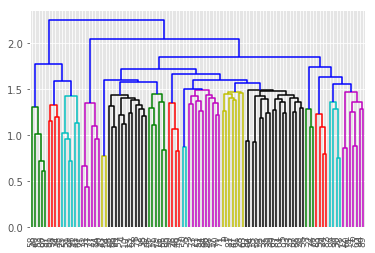

In [200]:
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9)
plt.show()

## Hierarchical Topics

#### To make your clusters more interpretable, change the labels on the data to be the titles of the articles.


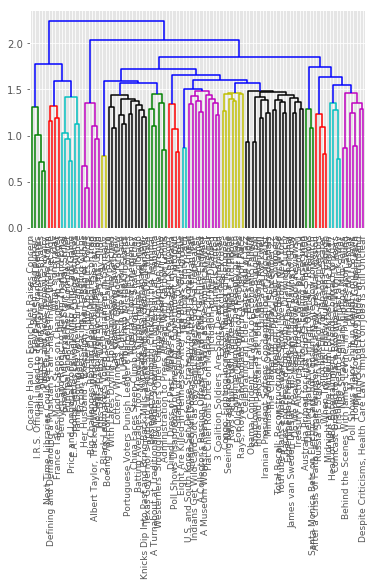

In [201]:
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=small_df['headline'].values)

#### Label each point with the title and the section.


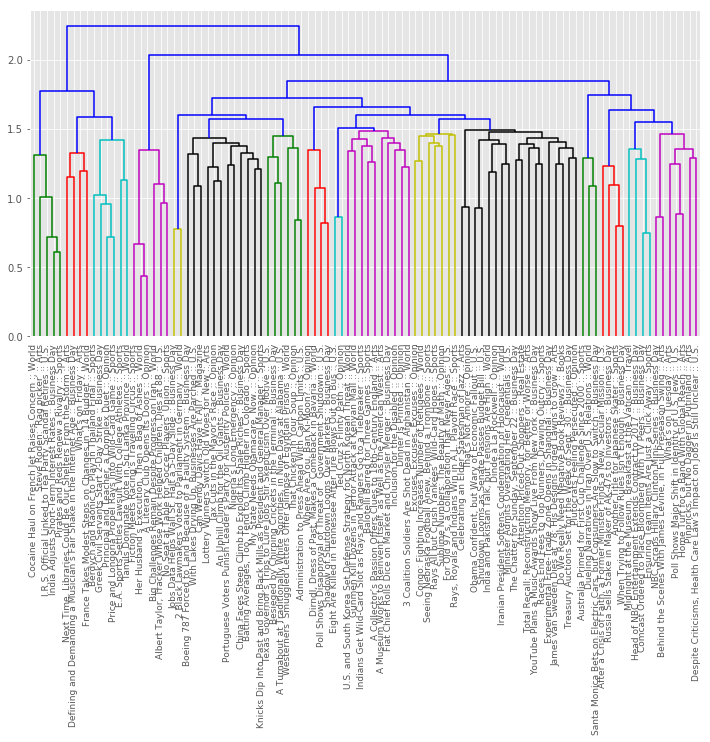

In [205]:
fig, ax = plt.subplots(1, figsize=(12, 6))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels) #加上 , orientation='right'

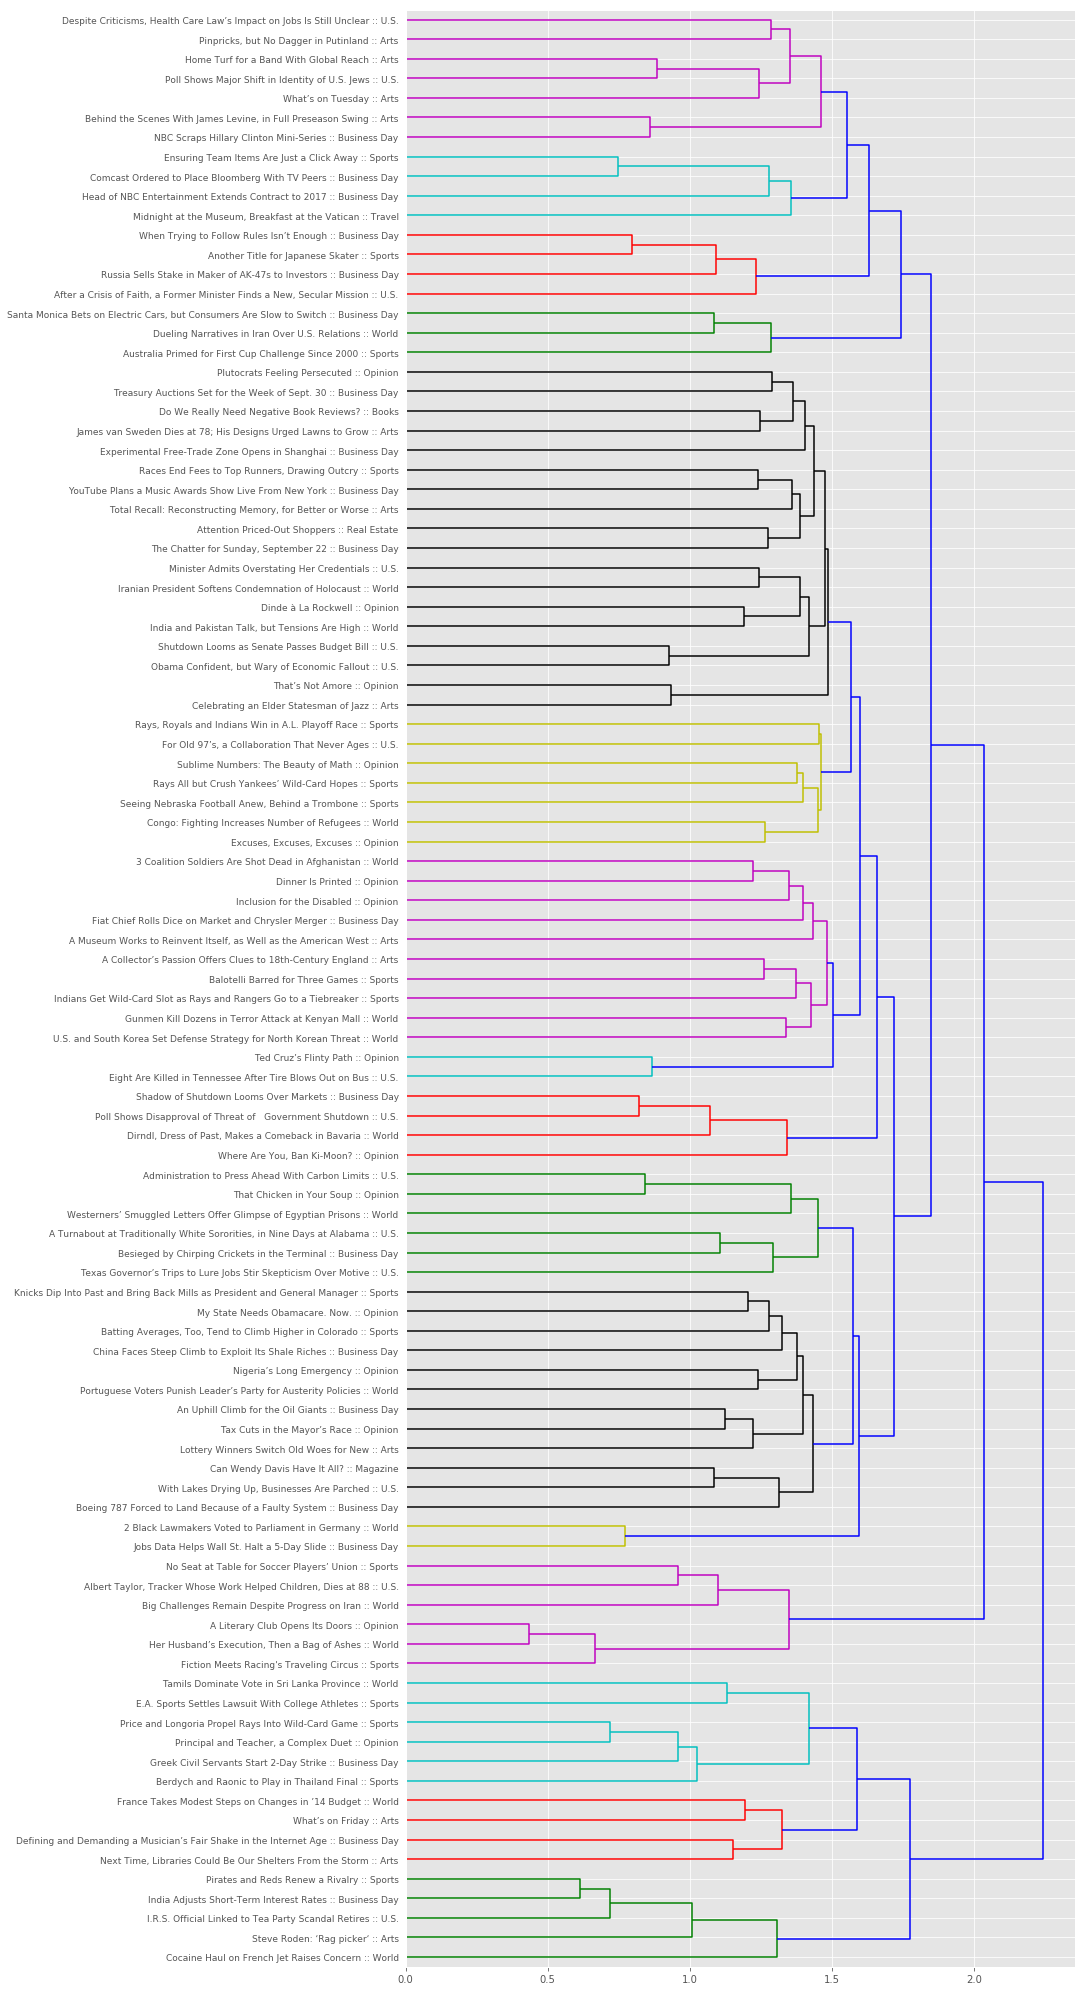

In [203]:
fig, ax = plt.subplots(1, figsize=(12, 36))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels, orientation='right')

#### Form flat clusters from linakge matrix by setting threshold

In [206]:
# form clusters from linkage matrix by setting threshold
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link, t=1.14) #t=1.14 is threshold！！！"cut line"
“”
df_res = pd.DataFrame({'section_name':small_df['section_name'],'clusters':clusters})
#print df_res
df_res['count'] = 1
print(df_res[['section_name','count']].groupby(['section_name']).sum())
print(df_res[['clusters','count']].groupby(['clusters']).sum())
print(df_res[['clusters','section_name','count']].groupby(['clusters','section_name']).sum())

              count
section_name       
Arts             13
Books             1
Business Day     20
Magazine          1
Opinion          15
Real Estate       1
Sports           17
Travel            1
U.S.             15
World            16
          count
clusters       
1            15
2             6
3             2
4            12
5             6
6             4
7             2
8             5
9             5
10           25
11           18
                       count
clusters section_name       
1        Arts              3
         Business Day      3
         Opinion           1
         Sports            4
         U.S.              1
         World             3
2        Opinion           1
         Sports            2
         U.S.              1
         World             2
3        Business Day      1
         World             1
4        Arts              1
         Business Day      3
         Magazine          1
         Opinion           3
         Sports            2
 

#### Explore different clusters on a per section basis.


In [207]:
def plot_dendrogram_by_categorty(articles_df, category, n_articles=20):
    mask = articles_df['section_name'] == category
    cat_df = articles_df[mask].sample(n=n_articles)
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    cat_X = vectorizer.fit_transform(cat_df['content'])
    distxy = squareform(pdist(cat_X.todense(), metric='cosine'))
    fig, ax = plt.subplots(1, figsize=(6, 6))
    
    labels = cat_df['headline'].values
    # labels = (cat_df['headline'] + ' :: ' + cat_df['subsection_name']).values
    
    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=8,
                        labels=labels,
                        orientation='right')
    ax.set_title(category)


/Users/yupeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]


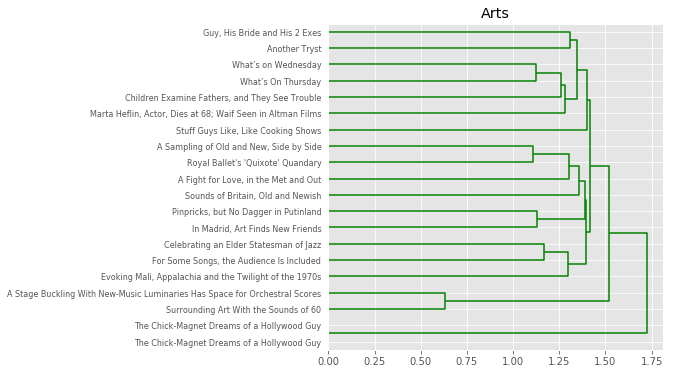

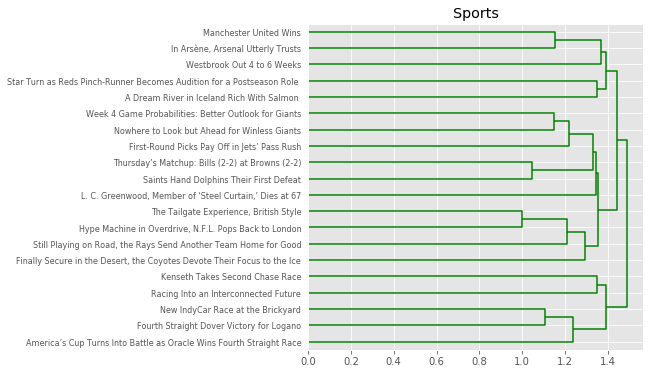

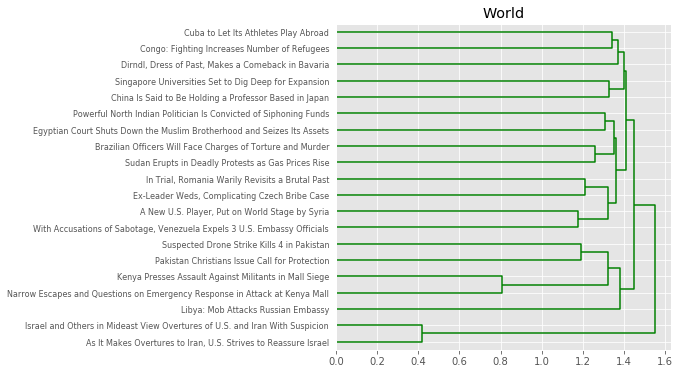

In [208]:
for category in ['Arts', 'Sports', 'World']:
    plot_dendrogram_by_categorty(articles_df, category)

#### Perform the same analysis as above and inspect the dendrogram with the words from the articles.

/Users/yupeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


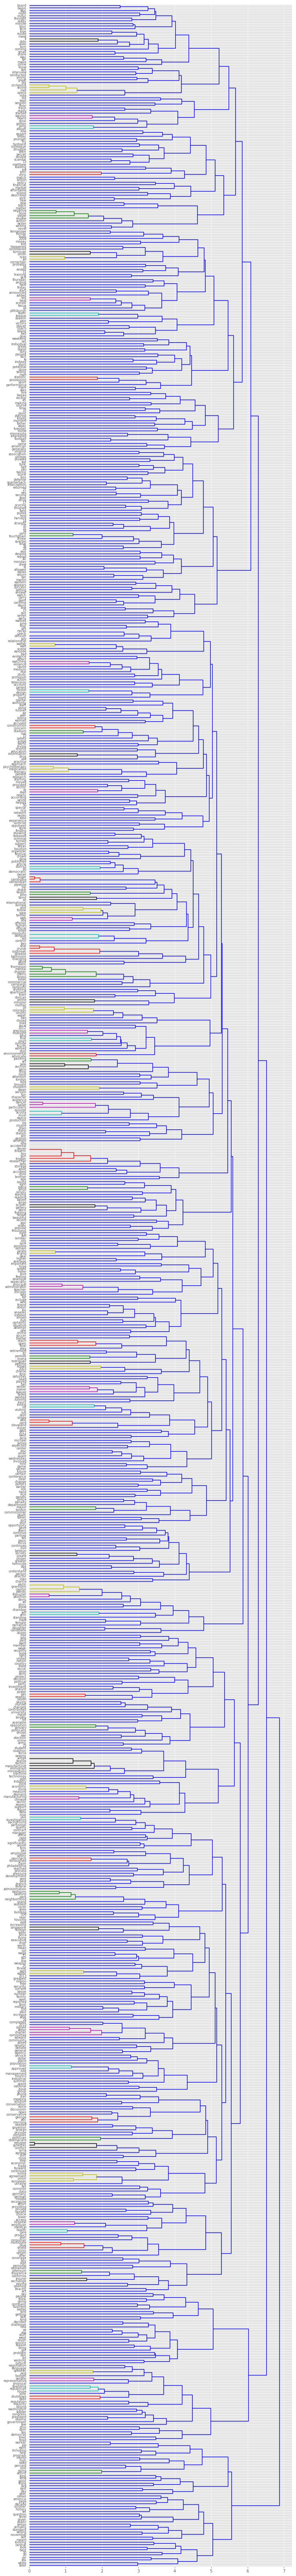

In [209]:
plt.figure(figsize=(12, 120))
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=2, leaf_font_size=8,
                    labels=small_features, orientation='right')